In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/tvanhout/oxides_ML/data/VASP_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Surface              601 non-null    object 
 1   Molecule Group       601 non-null    object 
 2   Molecule             601 non-null    object 
 3   Number of Carbons    601 non-null    int64  
 4   Initial Site         601 non-null    object 
 5   DFT Energy (System)  601 non-null    float64
 6   DFT Energy (Slab)    601 non-null    float64
 7   DFT Energy (Gas)     601 non-null    float64
 8   Adsorption Energy    601 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 42.4+ KB


In [25]:
molecule_groups = df['Molecule Group'].unique()
molecules = df['Molecule'].unique()

print("Dataset contains", len(molecules), "different molecules split over", len(molecule_groups), "groups.")

Dataset contains 38 different molecules split over 10 groups.


In [4]:
df_RuO2 = df[df['Surface'] == 'RuO2']
df_RuO2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 0 to 288
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Surface              289 non-null    object 
 1   Molecule Group       289 non-null    object 
 2   Molecule             289 non-null    object 
 3   Number of Carbons    289 non-null    int64  
 4   Initial Site         289 non-null    object 
 5   DFT Energy (System)  289 non-null    float64
 6   DFT Energy (Slab)    289 non-null    float64
 7   DFT Energy (Gas)     289 non-null    float64
 8   Adsorption Energy    289 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 22.6+ KB


In [5]:
df_IrO2 = df[df['Surface'] == 'IrO2']
df_IrO2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 312 entries, 289 to 600
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Surface              312 non-null    object 
 1   Molecule Group       312 non-null    object 
 2   Molecule             312 non-null    object 
 3   Number of Carbons    312 non-null    int64  
 4   Initial Site         312 non-null    object 
 5   DFT Energy (System)  312 non-null    float64
 6   DFT Energy (Slab)    312 non-null    float64
 7   DFT Energy (Gas)     312 non-null    float64
 8   Adsorption Energy    312 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 24.4+ KB


# Removing duplicates

In [6]:
# Tolerance
tolerance = 0.01


df_sorted = df.sort_values(by=['Molecule', 'Adsorption Energy'])
df_sorted['Energy_Diff'] = df_sorted.groupby('Molecule')['Adsorption Energy'].diff()
df_filtered = df_sorted[(df_sorted['Energy_Diff'].isna()) | (df_sorted['Energy_Diff'].abs() >= tolerance)]

df_filtered = df_filtered.drop(columns=['Energy_Diff'])
df_filtered = df_filtered.reset_index(drop=True)

df_filtered.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Surface              494 non-null    object 
 1   Molecule Group       494 non-null    object 
 2   Molecule             494 non-null    object 
 3   Number of Carbons    494 non-null    int64  
 4   Initial Site         494 non-null    object 
 5   DFT Energy (System)  494 non-null    float64
 6   DFT Energy (Slab)    494 non-null    float64
 7   DFT Energy (Gas)     494 non-null    float64
 8   Adsorption Energy    494 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 34.9+ KB


In [7]:
df_RuO2 = df_filtered[df_filtered['Surface'] == 'RuO2'].sort_values(by=['Molecule Group', 'Number of Carbons']).reset_index(drop=True)
df_RuO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Surface              244 non-null    object 
 1   Molecule Group       244 non-null    object 
 2   Molecule             244 non-null    object 
 3   Number of Carbons    244 non-null    int64  
 4   Initial Site         244 non-null    object 
 5   DFT Energy (System)  244 non-null    float64
 6   DFT Energy (Slab)    244 non-null    float64
 7   DFT Energy (Gas)     244 non-null    float64
 8   Adsorption Energy    244 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 17.3+ KB


In [8]:
df_IrO2 = df_filtered[df_filtered['Surface'] == 'IrO2'].sort_values(by=['Molecule Group','Number of Carbons']).reset_index(drop=True)
df_IrO2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Surface              250 non-null    object 
 1   Molecule Group       250 non-null    object 
 2   Molecule             250 non-null    object 
 3   Number of Carbons    250 non-null    int64  
 4   Initial Site         250 non-null    object 
 5   DFT Energy (System)  250 non-null    float64
 6   DFT Energy (Slab)    250 non-null    float64
 7   DFT Energy (Gas)     250 non-null    float64
 8   Adsorption Energy    250 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 17.7+ KB


# Global Energy Distribution

In [9]:
df_filtered["Adsorption Energy"].describe()

count    494.000000
mean      -1.526721
std        1.087484
min       -5.960000
25%       -2.337500
50%       -1.450000
75%       -0.522500
max        0.880000
Name: Adsorption Energy, dtype: float64

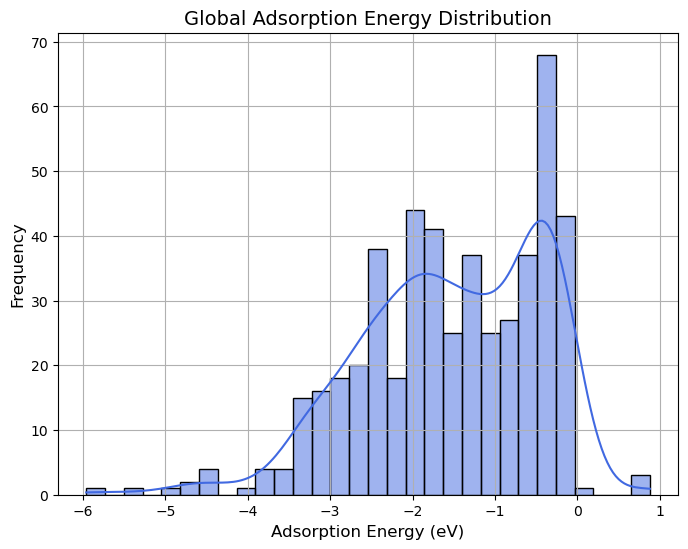

In [10]:
plt.figure(figsize=(8, 6))

sns.histplot(df_filtered["Adsorption Energy"], bins=30, kde=True, color="royalblue")

# Labels and formatting
plt.xlabel("Adsorption Energy (eV)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Global Adsorption Energy Distribution", fontsize=14)
plt.grid(True)

plt.show()

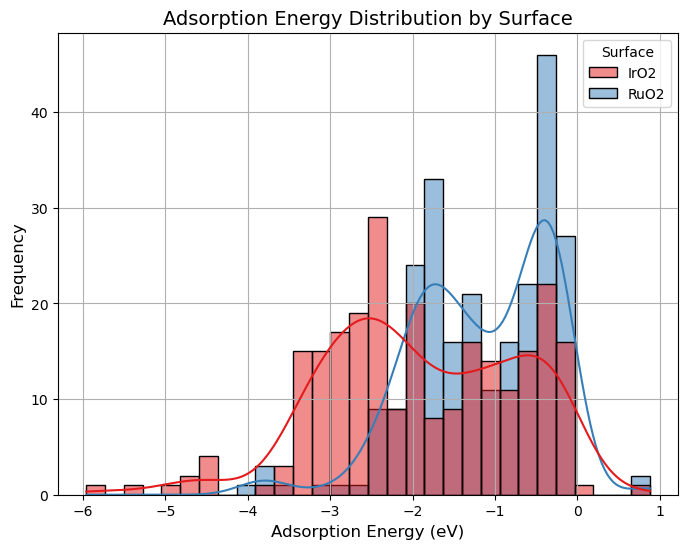

In [11]:
plt.figure(figsize=(8, 6))

sns.histplot(df_filtered, x="Adsorption Energy", hue="Surface", bins=30, kde=True, palette="Set1")

plt.xlabel("Adsorption Energy (eV)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Adsorption Energy Distribution by Surface", fontsize=14)
plt.grid(True)

plt.show()

In [12]:
df_RuO2["Adsorption Energy"].describe()

count    244.000000
mean      -1.154836
std        0.838738
min       -3.960000
25%       -1.772500
50%       -1.140000
75%       -0.397500
max        0.880000
Name: Adsorption Energy, dtype: float64

In [13]:
df_IrO2["Adsorption Energy"].describe()

count    250.000000
mean      -1.889680
std        1.177784
min       -5.960000
25%       -2.737500
50%       -2.000000
75%       -0.865000
max        0.780000
Name: Adsorption Energy, dtype: float64

# Molecule Group Insights

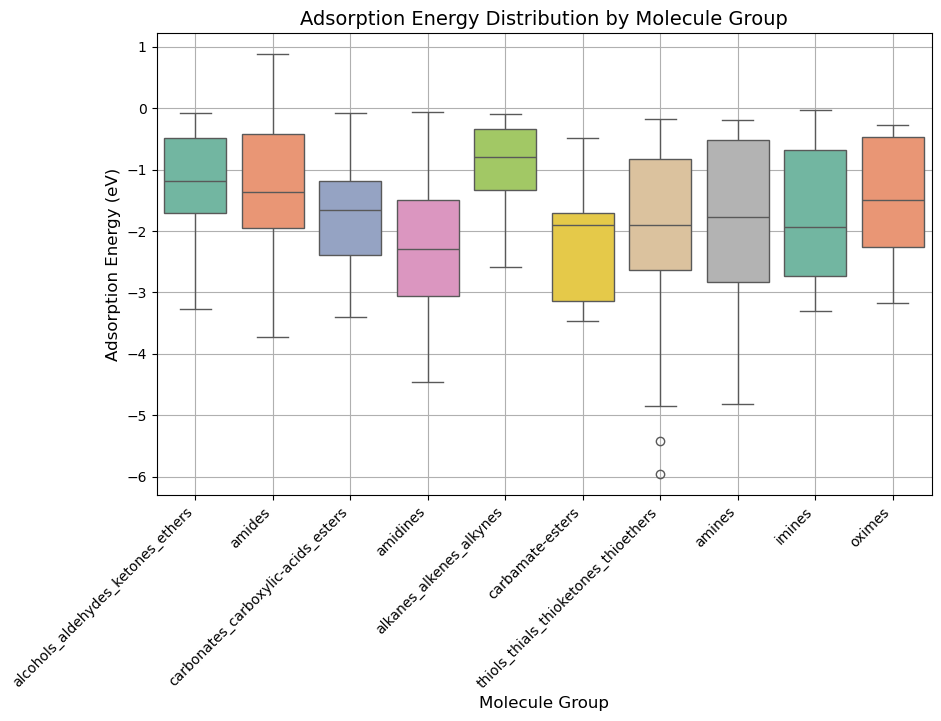

In [14]:
plt.figure(figsize=(10, 6))

sns.boxplot(x="Molecule Group", y="Adsorption Energy", data=df_filtered, hue="Molecule Group", palette="Set2", legend=False)

# Labels and formatting
plt.xlabel("Molecule Group", fontsize=12)
plt.ylabel("Adsorption Energy (eV)", fontsize=12)
plt.title("Adsorption Energy Distribution by Molecule Group", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotate x labels for readability
plt.grid(True)

plt.show()


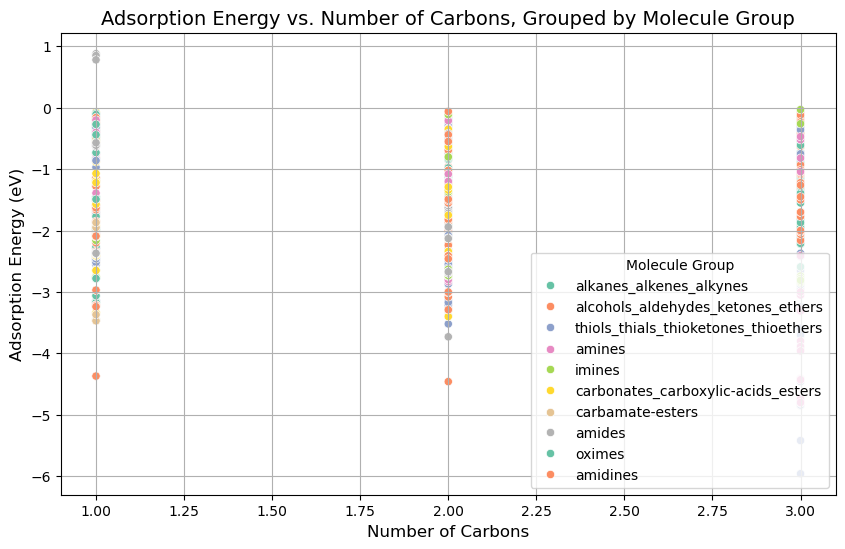

In [15]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x="Number of Carbons", y="Adsorption Energy", hue="Molecule Group", data=df, palette="Set2")

# Labels and formatting
plt.xlabel("Number of Carbons", fontsize=12)
plt.ylabel("Adsorption Energy (eV)", fontsize=12)
plt.title("Adsorption Energy vs. Number of Carbons, Grouped by Molecule Group", fontsize=14)
plt.grid(True)

plt.show()


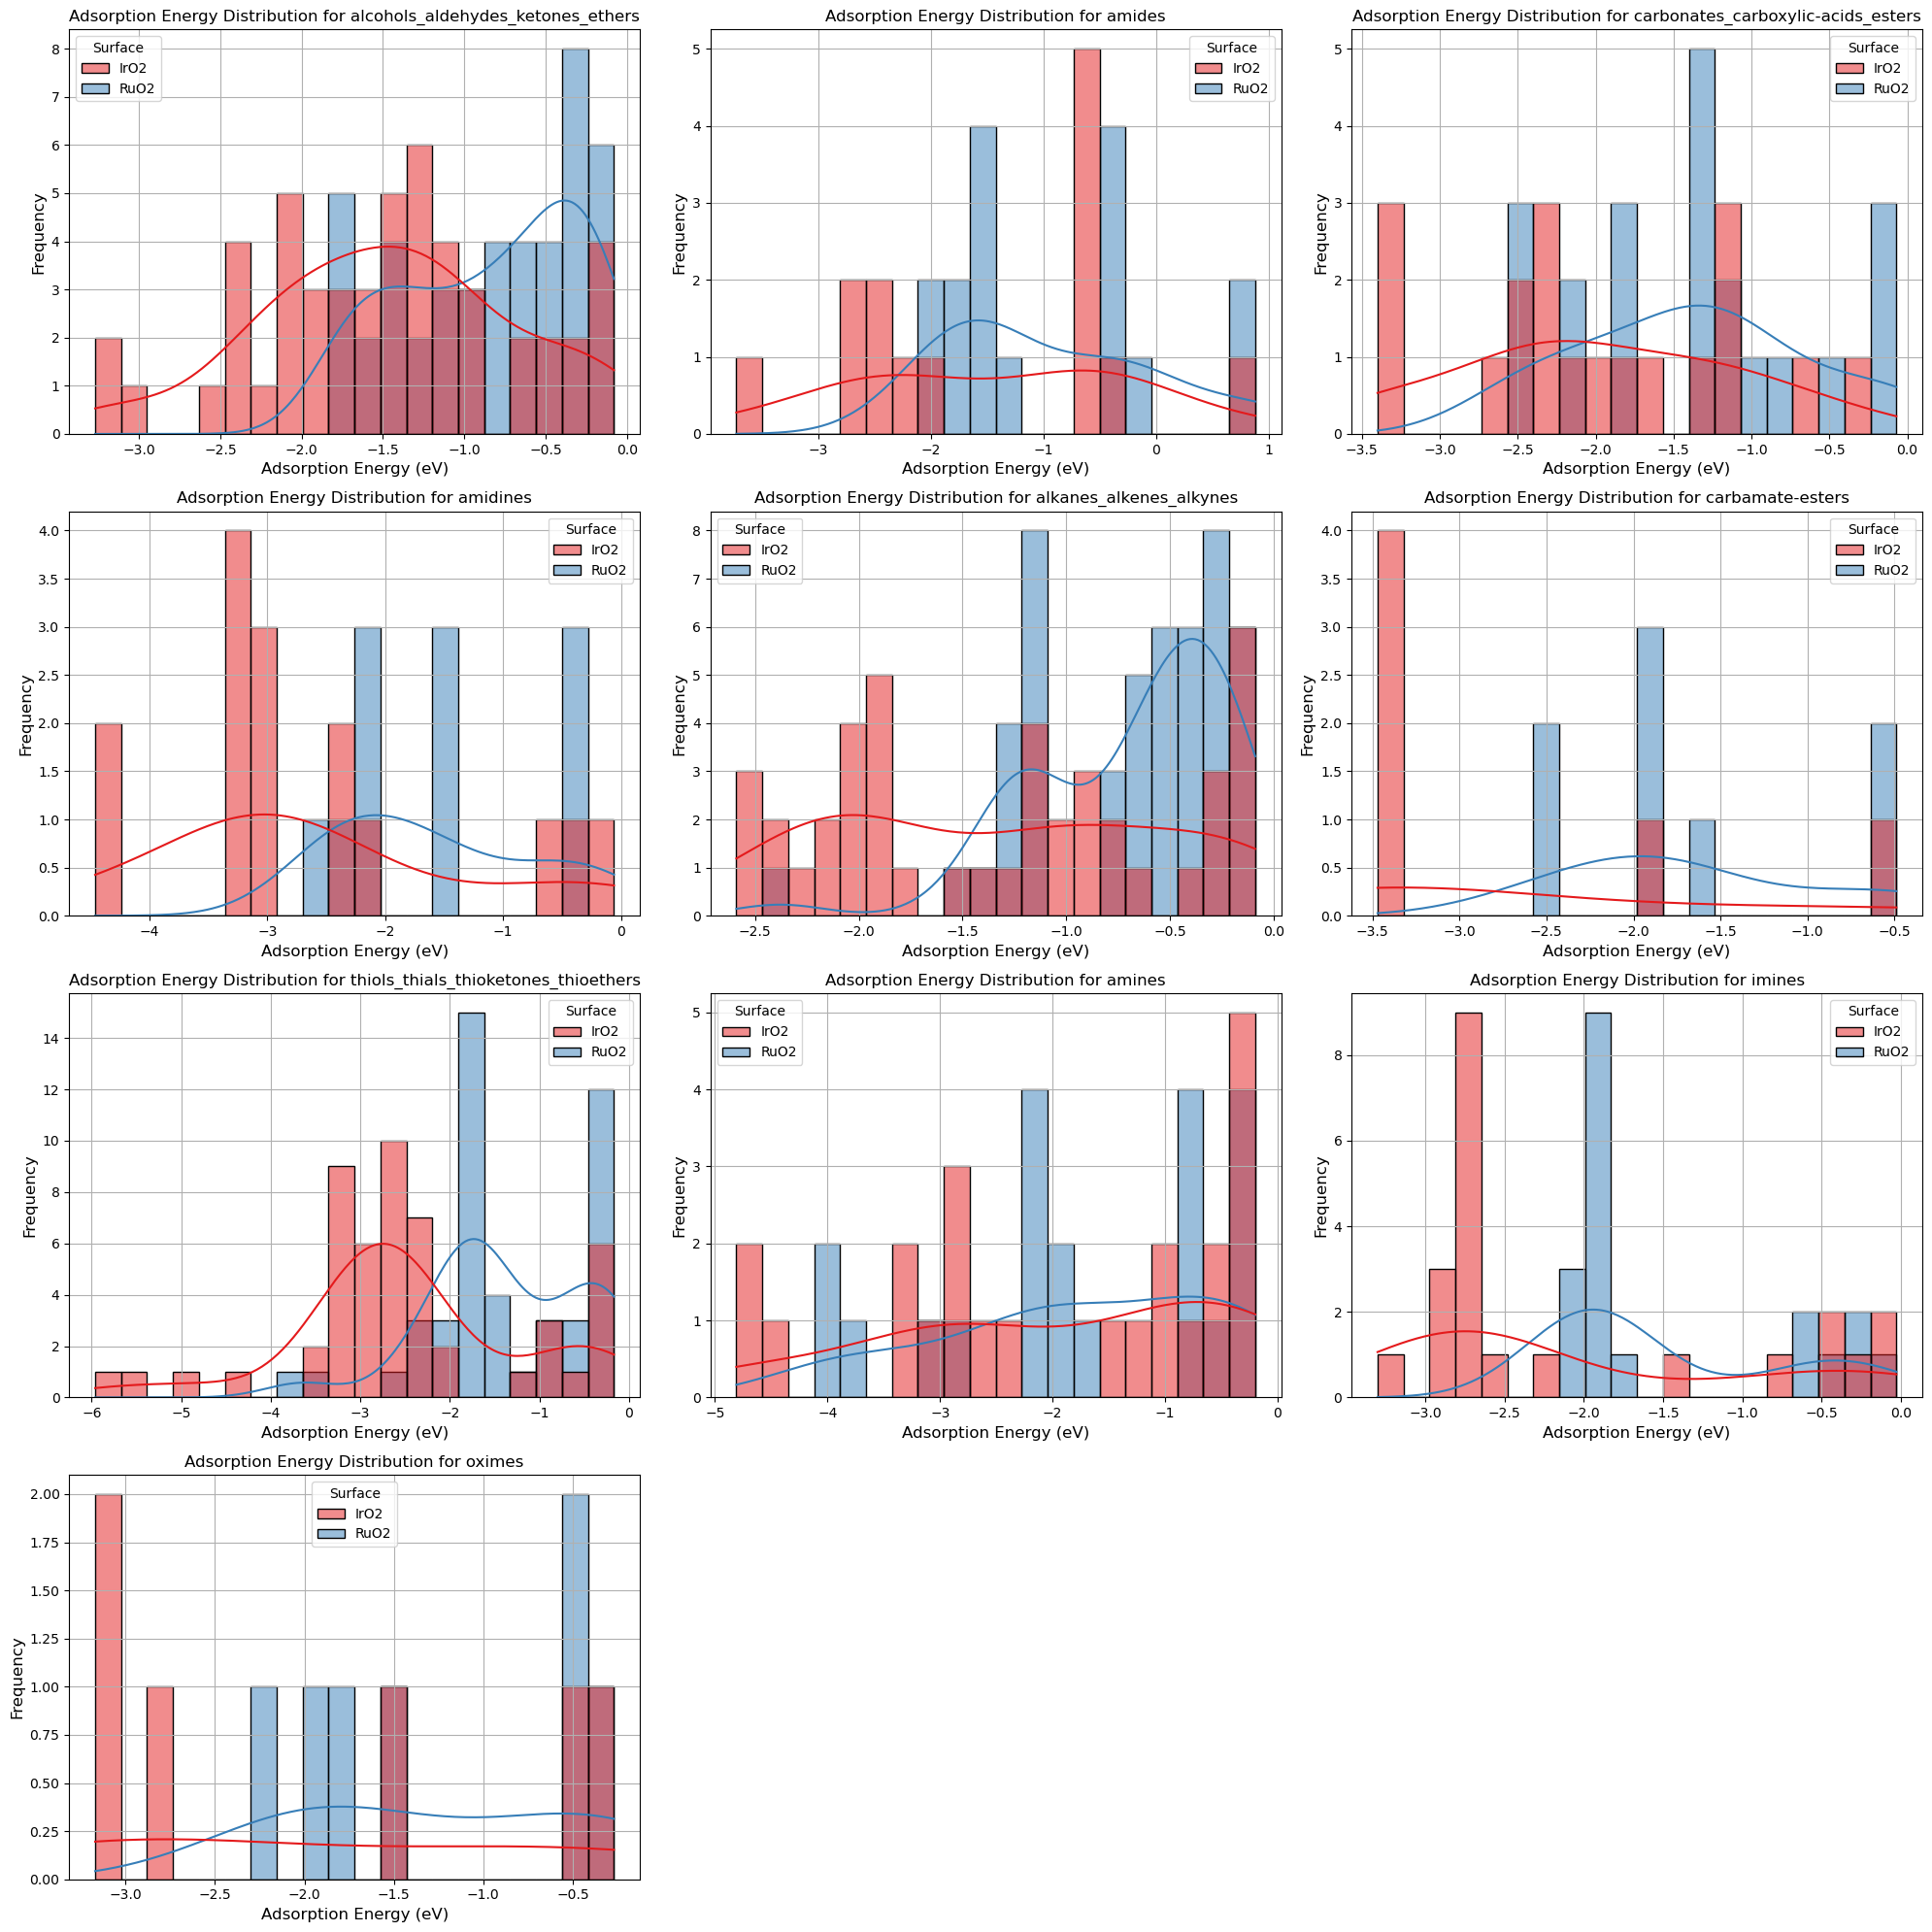

In [16]:

molecule_groups = df_filtered['Molecule Group'].unique()

num_groups = len(molecule_groups)
ncols = 3 
nrows = (num_groups // ncols) + (num_groups % ncols > 0)

fig, axes = plt.subplots(nrows, ncols, figsize=(20, 5 * nrows))
axes = axes.flatten()

# Plot each molecule group's adsorption energy distribution in a grid
for i, group in enumerate(molecule_groups):
    group_data = df_filtered[df_filtered['Molecule Group'] == group]
    
    sns.histplot(group_data, x='Adsorption Energy', hue='Surface', bins=20, kde=True, ax=axes[i], palette="Set1")
    
    # Set the title and labels
    axes[i].set_title(f"Adsorption Energy Distribution for {group}", fontsize=12)
    axes[i].set_xlabel("Adsorption Energy (eV)", fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].grid(True)

# Remove any unused subplots if the grid size is larger than needed
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
fig.tight_layout()

# Show the plot
plt.show()

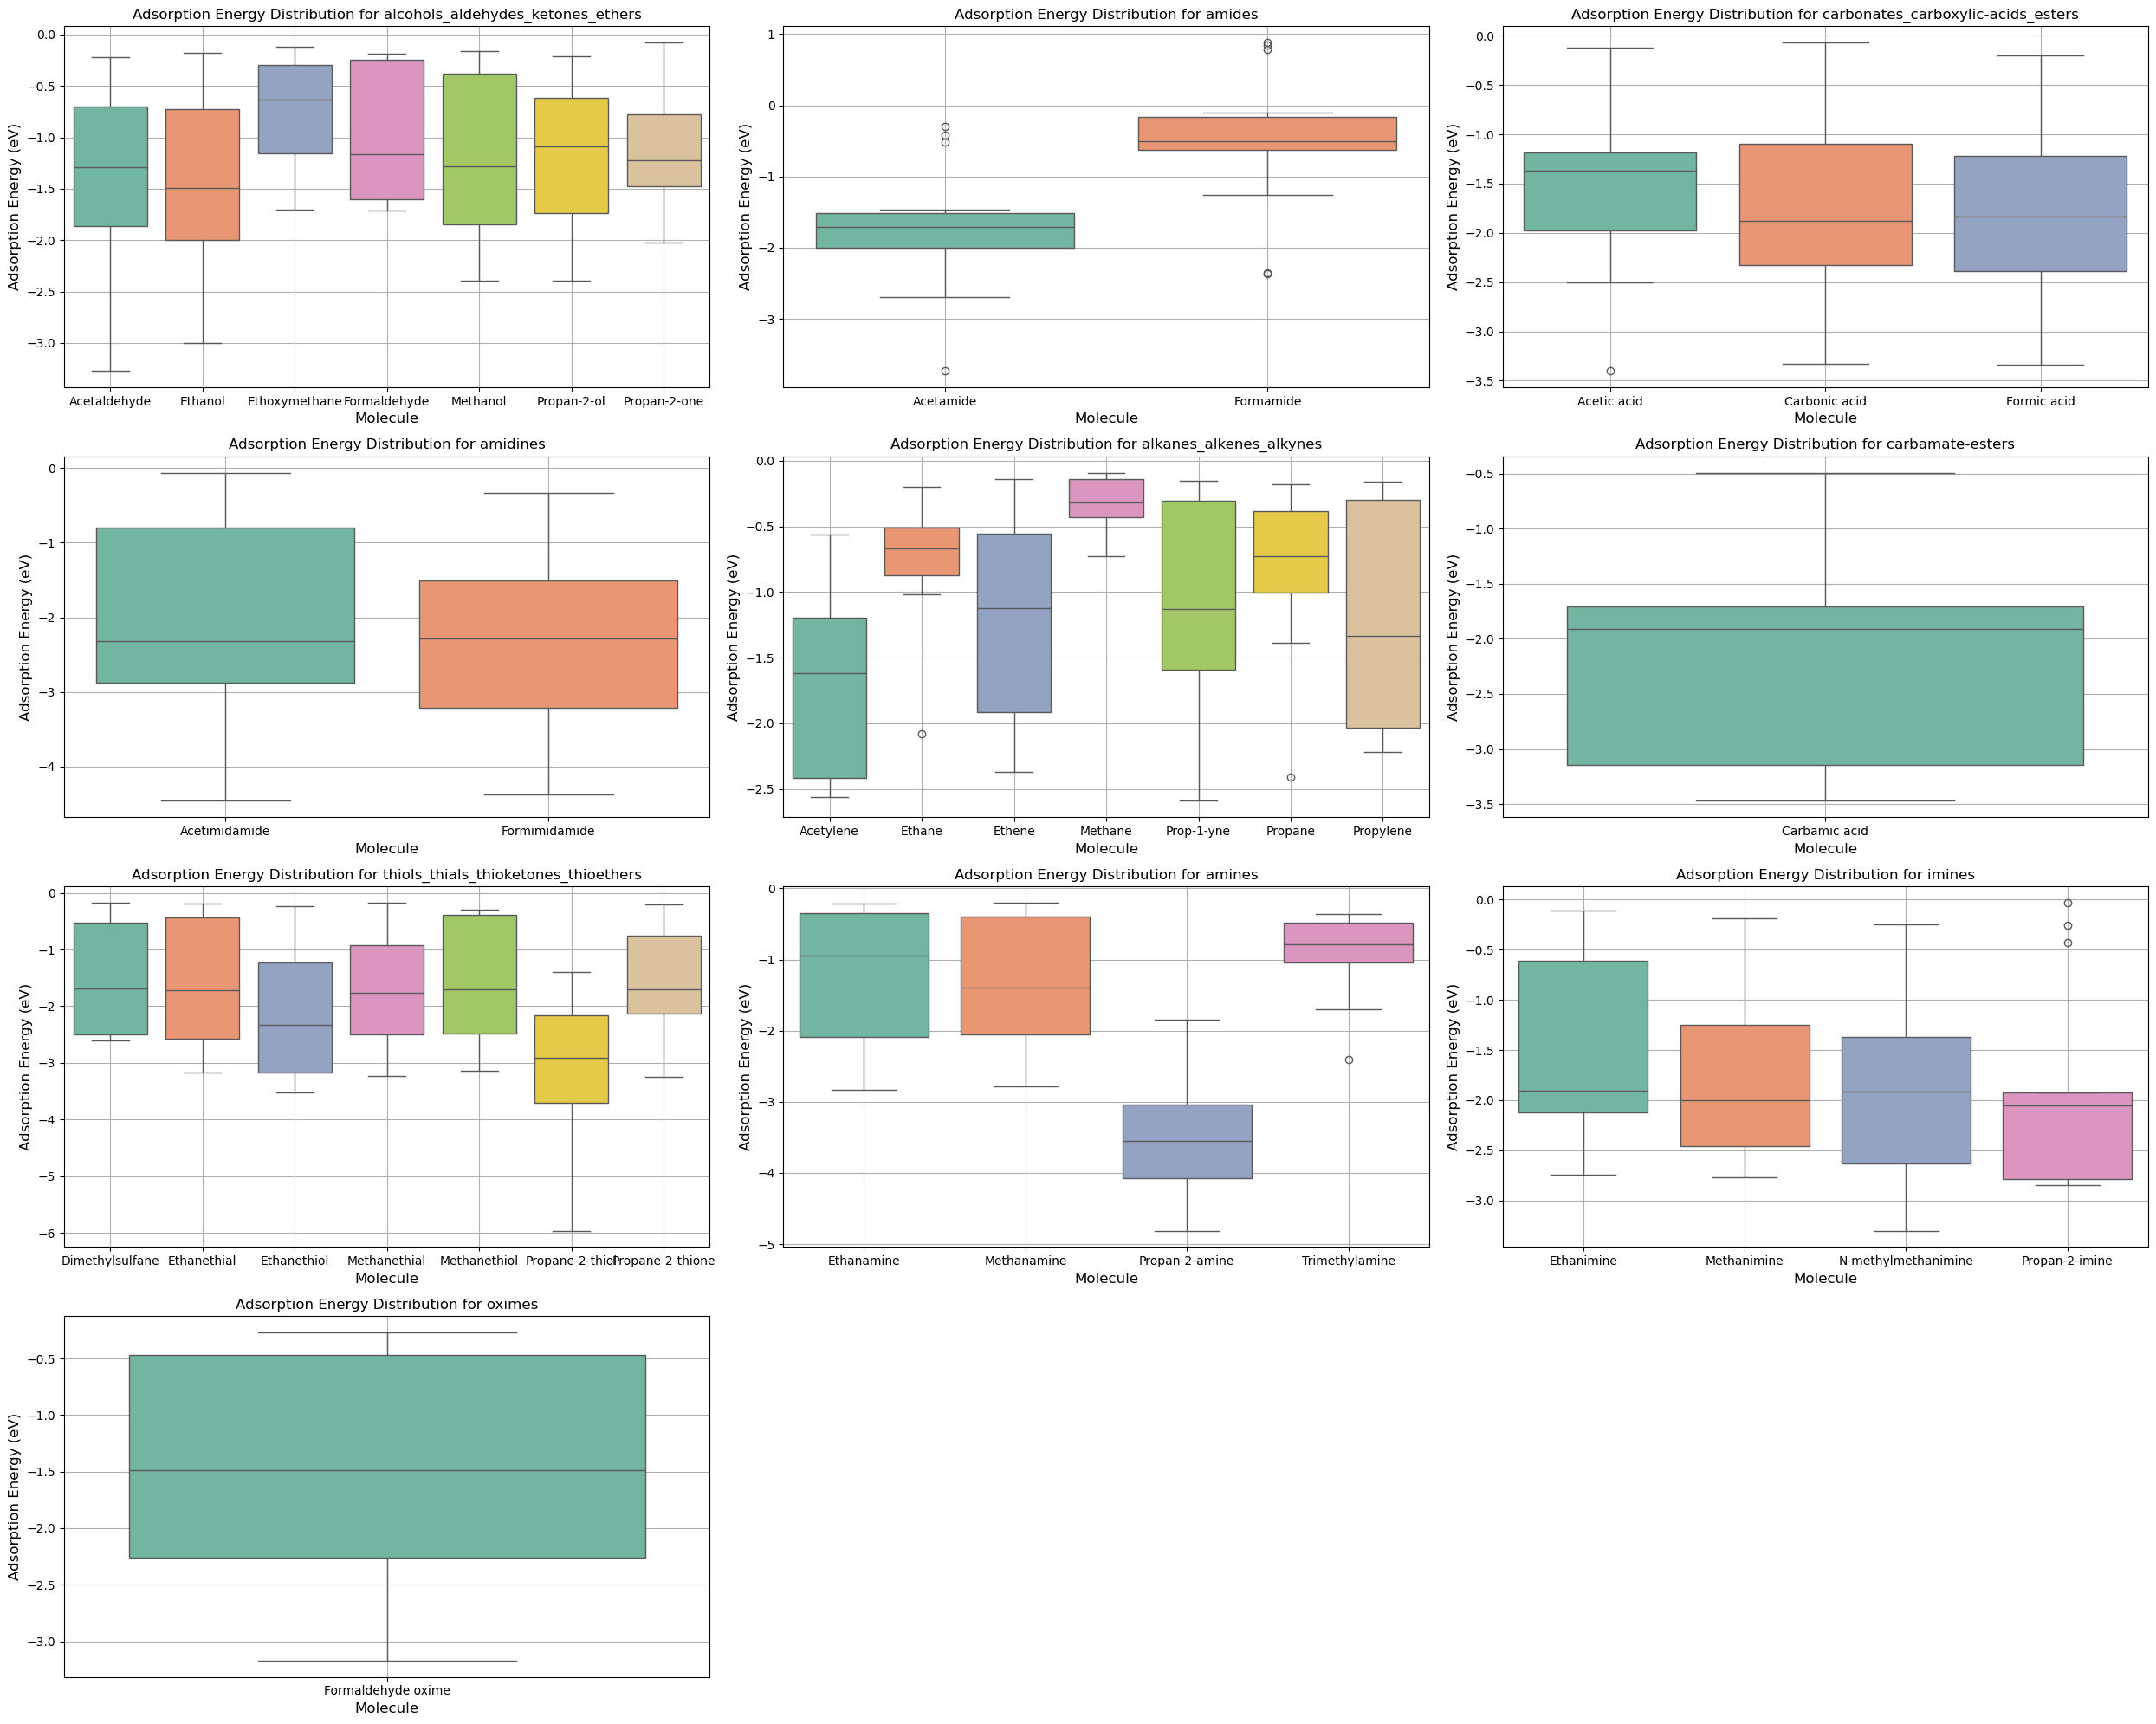

In [ ]:
molecule_groups = df_filtered['Molecule Group'].unique()

# Determine the number of groups and adjust the grid size
num_groups = len(molecule_groups)
ncols = 3 
nrows = (num_groups // ncols) + (num_groups % ncols > 0)

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(25, 5 * nrows))
axes = axes.flatten()

# Plot each molecule group's adsorption energy distribution in a grid
for i, group in enumerate(molecule_groups):
    group_data = df_filtered[df_filtered['Molecule Group'] == group]
    
    # Plot boxplot for each molecule group
    sns.boxplot(x='Molecule', y='Adsorption Energy', data=group_data, ax=axes[i], hue='Molecule', palette="Set2", legend=False)
    
    # Set the title and labels for each plot
    axes[i].set_title(f"Adsorption Energy Distribution for {group}", fontsize=12)
    axes[i].set_xlabel("Molecule", fontsize=12)
    axes[i].set_ylabel("Adsorption Energy (eV)", fontsize=12)
    axes[i].grid(True)

# Remove any unused subplots if the grid size is larger than needed
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap and improve readability
fig.tight_layout()

# Show the plot
plt.show()


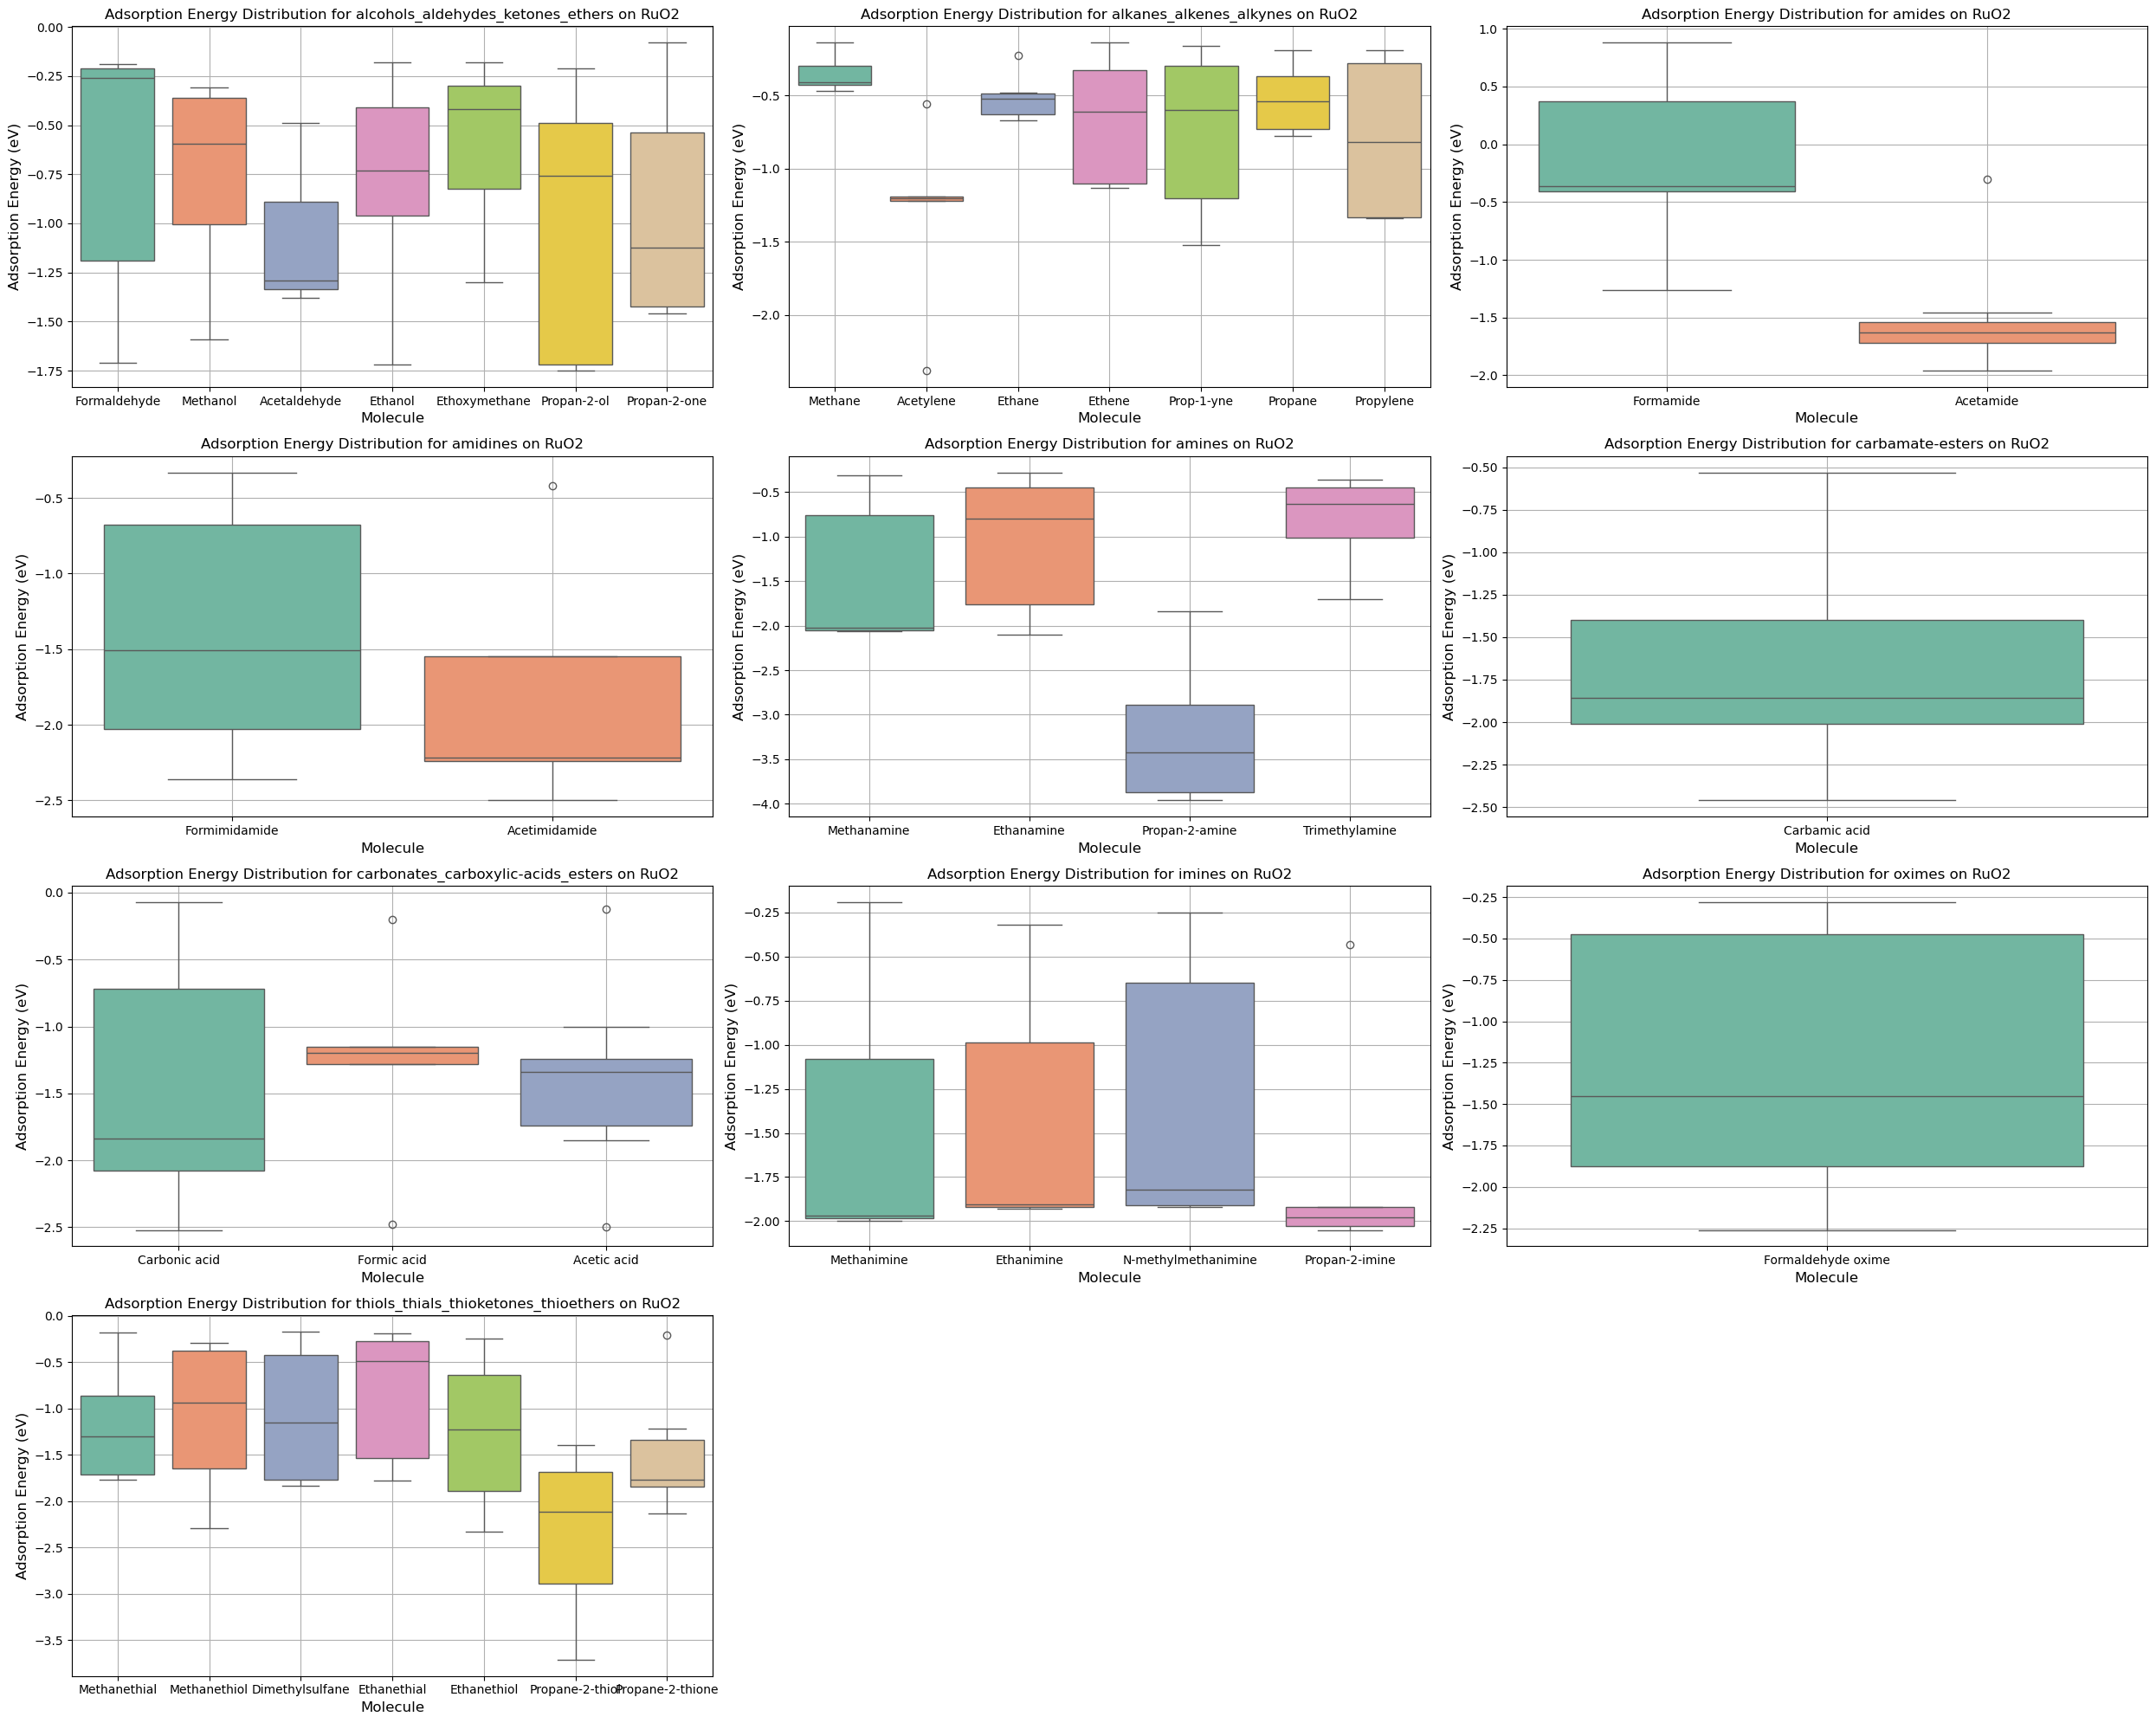

In [23]:
molecule_groups = df_RuO2['Molecule Group'].unique()

# Determine the number of groups and adjust the grid size
num_groups = len(molecule_groups)
ncols = 3 
nrows = (num_groups // ncols) + (num_groups % ncols > 0)

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(25, 5 * nrows))
axes = axes.flatten()

# Plot each molecule group's adsorption energy distribution in a grid
for i, group in enumerate(molecule_groups):
    group_data = df_RuO2[df_RuO2['Molecule Group'] == group]
    
    # Plot boxplot for each molecule group
    sns.boxplot(x='Molecule', y='Adsorption Energy', data=group_data, ax=axes[i], hue='Molecule', palette="Set2", legend=False)
    
    # Set the title and labels for each plot
    axes[i].set_title(f"Adsorption Energy Distribution for {group} on RuO2", fontsize=12)
    axes[i].set_xlabel("Molecule", fontsize=12)
    axes[i].set_ylabel("Adsorption Energy (eV)", fontsize=12)
    axes[i].grid(True)

# Remove any unused subplots if the grid size is larger than needed
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap and improve readability
fig.tight_layout()

# Show the plot
plt.show()

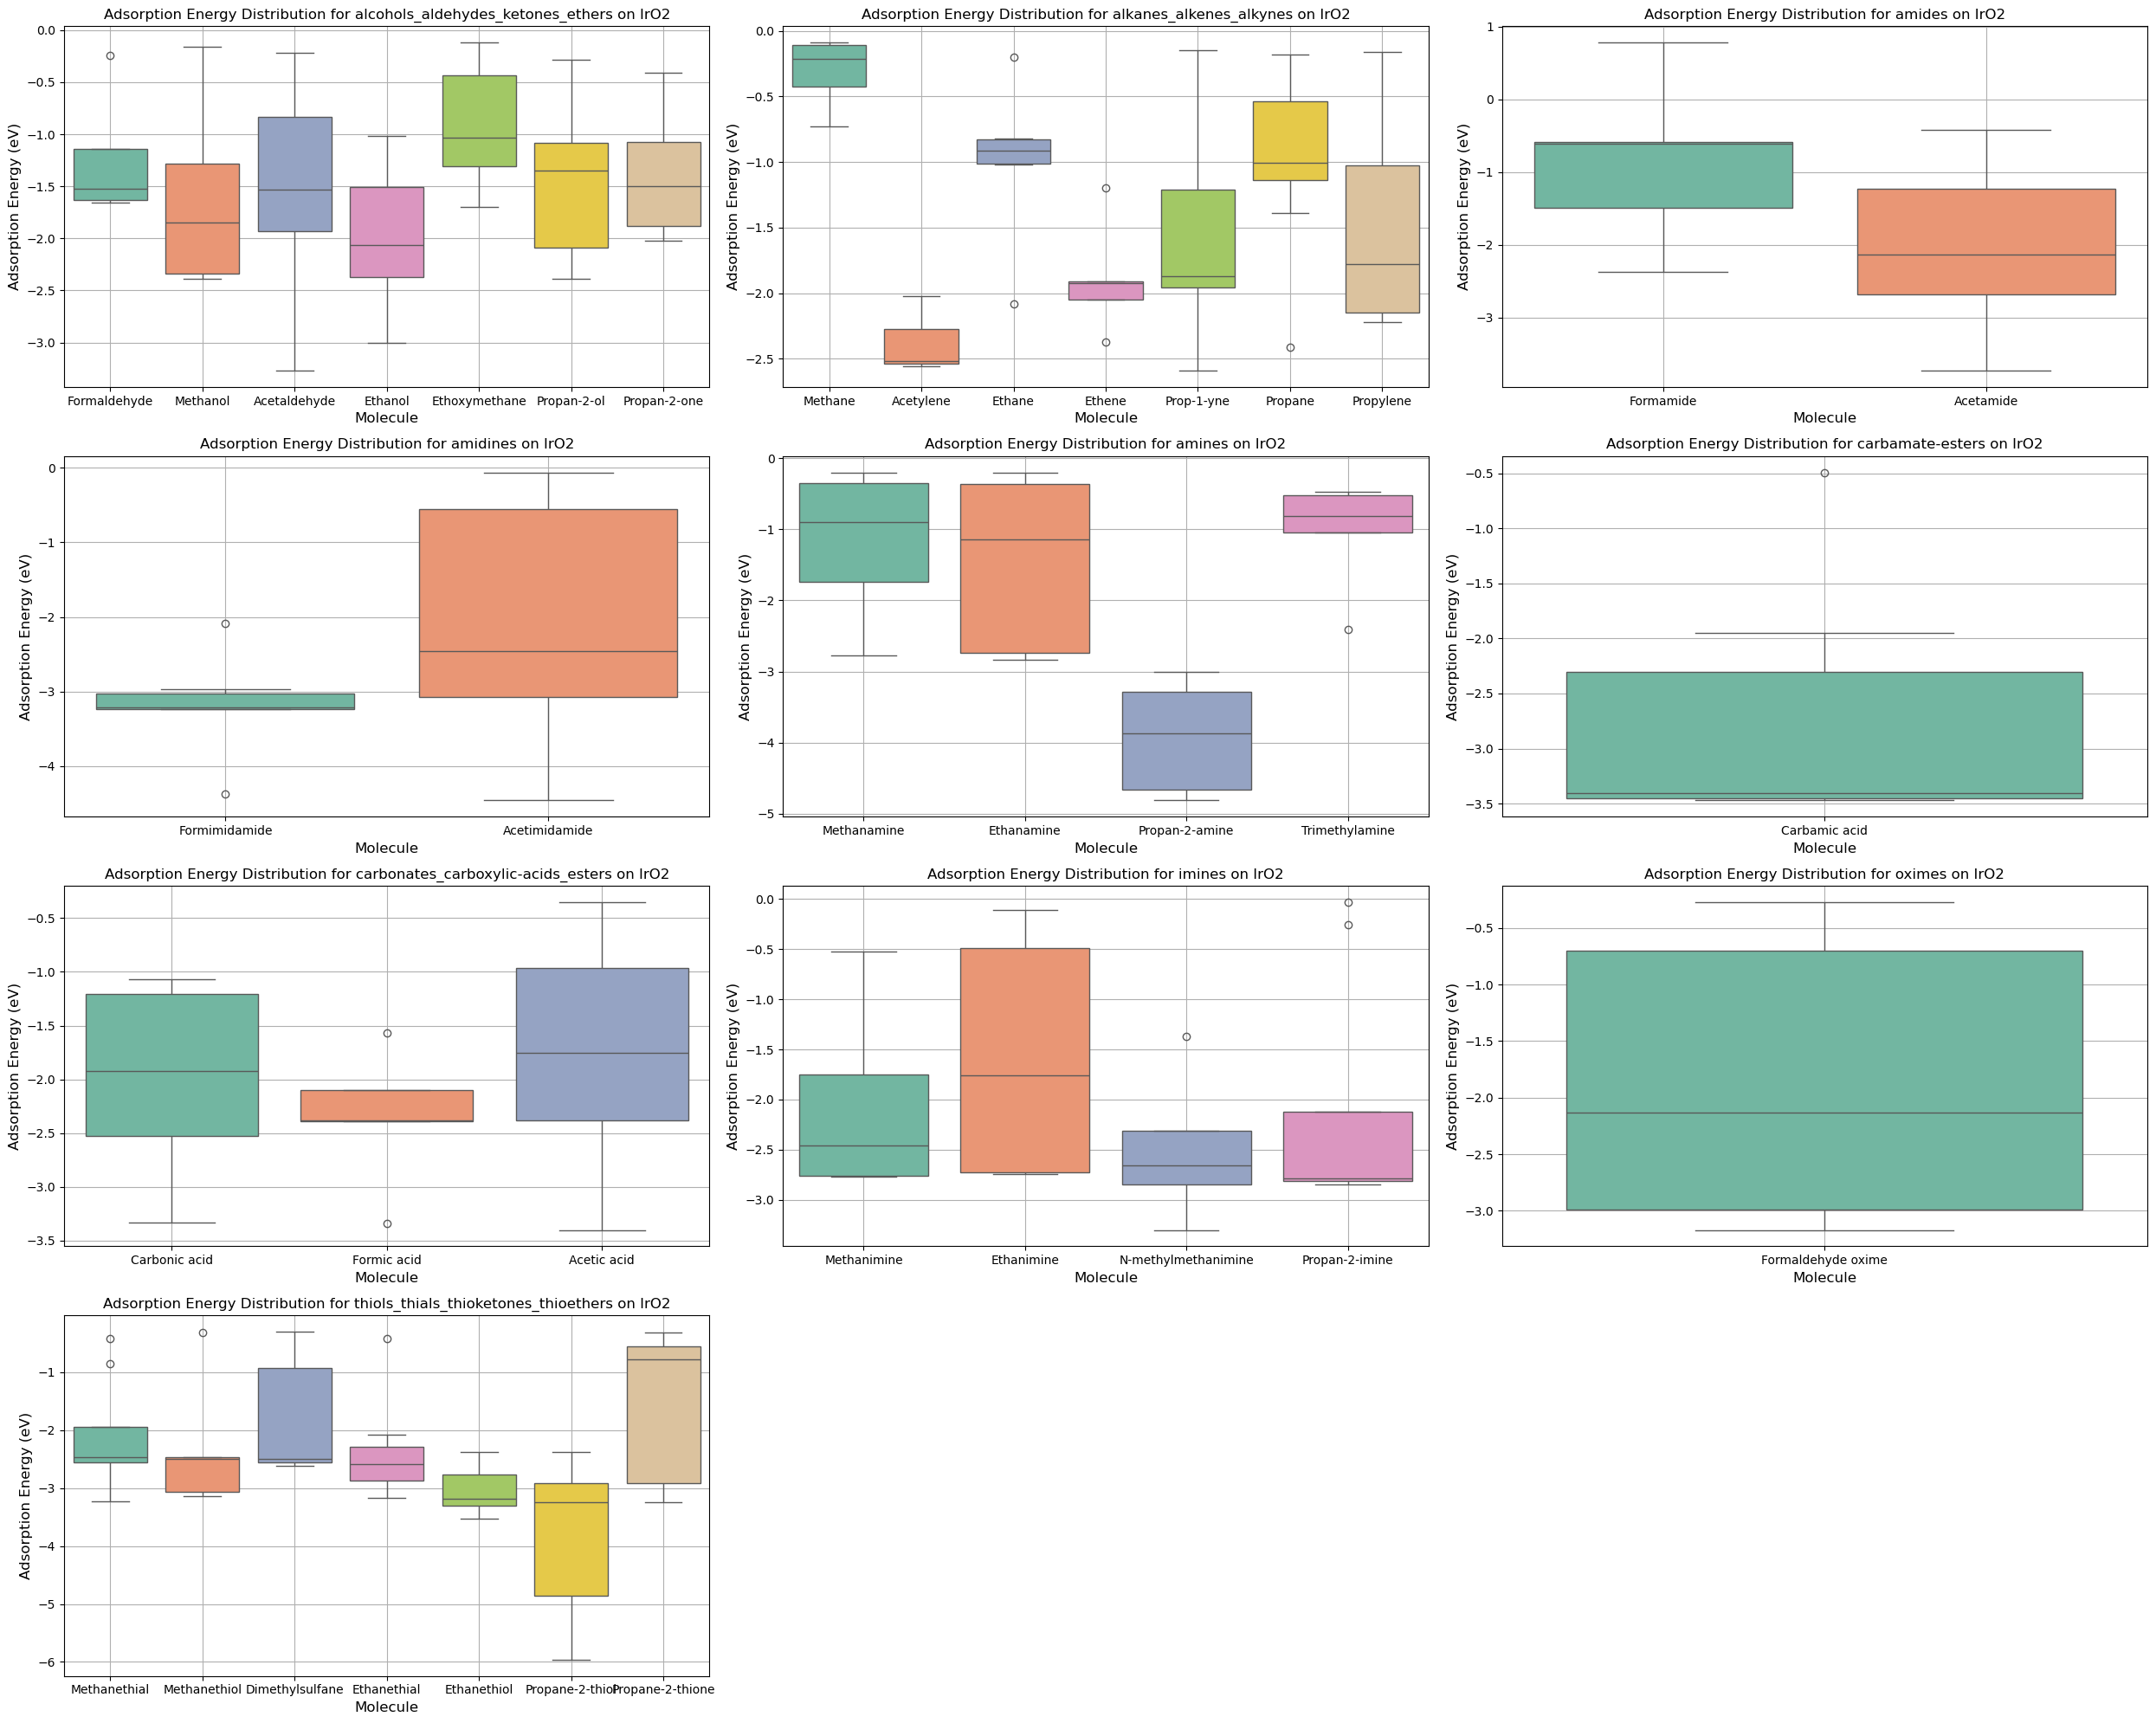

In [24]:
molecule_groups = df_IrO2['Molecule Group'].unique()

# Determine the number of groups and adjust the grid size
num_groups = len(molecule_groups)
ncols = 3 
nrows = (num_groups // ncols) + (num_groups % ncols > 0)

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(25, 5 * nrows))
axes = axes.flatten()

# Plot each molecule group's adsorption energy distribution in a grid
for i, group in enumerate(molecule_groups):
    group_data = df_IrO2[df_IrO2['Molecule Group'] == group]
    
    # Plot boxplot for each molecule group
    sns.boxplot(x='Molecule', y='Adsorption Energy', data=group_data, ax=axes[i], hue='Molecule', palette="Set2", legend=False)
    
    # Set the title and labels for each plot
    axes[i].set_title(f"Adsorption Energy Distribution for {group} on IrO2", fontsize=12)
    axes[i].set_xlabel("Molecule", fontsize=12)
    axes[i].set_ylabel("Adsorption Energy (eV)", fontsize=12)
    axes[i].grid(True)

# Remove any unused subplots if the grid size is larger than needed
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap and improve readability
fig.tight_layout()

# Show the plot
plt.show()